# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score

from IPython.display import HTML
from IPython.display import display

warnings.filterwarnings('ignore')

#%matplotlib ipympl # Interactive mode
%matplotlib inline

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
sdasdda. <a href="javascript:code_toggle()">--></a>''')
display(tag)

### Generating a dataset

In [2]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Show data. <a href="javascript:code_toggle()">--></a>''')
display(tag)

x, y = make_blobs(n_samples=80,
                  centers=3,
                  random_state=2,
                  cluster_std=0.75)

print('Dataset (x)' + '\n', pd.DataFrame(x).head(), '\n')
print('Target (y)' + '\n', pd.Series(y).head(), '\n')

Dataset (x)
           0         1
0 -1.756111 -9.100178
1  0.963572 -1.049050
2 -2.656752 -3.582134
3  0.320185 -4.498184
4 -0.821596 -9.445497 

Target (y)
 0    0
1    1
2    2
3    2
4    0
dtype: int64 



### Plotting the dataset

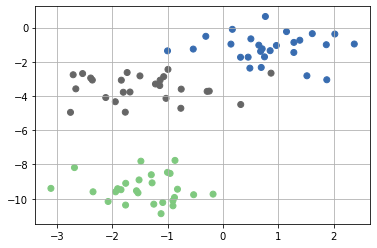

In [3]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasa. <a href="javascript:code_toggle()">--></a>''')
display(tag)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Accent')
plt.grid()
plt.show()

### Define a function to classificate areas

In [4]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasd. <a href="javascript:code_toggle()">--></a>''')
display(tag)

def classificator_areas_plot(model, x, y, name_model, test_idx=None):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_dark = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
                                
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), 
                         np.arange(y_min, y_max, 0.05))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_dark)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('The model is ' + name_model)
    
    if test_idx != None:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                    edgecolors='k',
                    facecolors='none',
                    label='Test')

### Generating a logistic regression model

In [5]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasd. <a href="javascript:code_toggle()">--></a>''')
display(tag)

logic_regre = LogisticRegression().fit(x, y)

display(logic_regre)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Using our model to generate predictions

Predicted Values
 0    0
1    1
2    2
3    0
4    0
dtype: int64


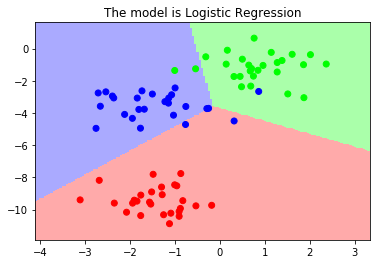

In [6]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdas. <a href="javascript:code_toggle()">--></a>''')
display(tag)

classificator_areas_plot(logic_regre, x, y, 'Logistic Regression')

predict = logic_regre.predict(x)

print('Predicted Values' + '\n', pd.Series(predict).head())

### Model Accuracy

In [7]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
dasdasda. <a href="javascript:code_toggle()">--></a>''')
display(tag)

accu_log_regre = accuracy_score(y, predict)

print('La precision del algoritmo Regresión Logística es ', round(accu_log_regre, 2))

La precision del algoritmo Regresión Logística es  0.92
